In [1]:
import os
import shutil
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from PIL import Image
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [2]:

def crop_and_resize_images(images_root, masks_root, detections_root, output_images_root, output_masks_root, resize_shape):
    """
    Crops images and masks based on bounding boxes from detection files and resizes the output.

    Parameters:
        images_root (str): Path to the root directory containing image folders.
        masks_root (str): Path to the root directory containing mask folders.
        detections_root (str): Path to the root directory containing detection files.
        output_images_root (str): Path to save cropped and resized images.
        output_masks_root (str): Path to save cropped and resized masks.
        resize_shape (tuple): The target size (width, height) to resize cropped images and masks.
    """
    # Ensure output directories exist
    os.makedirs(output_images_root, exist_ok=True)
    os.makedirs(output_masks_root, exist_ok=True)

    # Iterate through each patient directory
    for patient_id in os.listdir(images_root):
        patient_images_dir = os.path.join(images_root, patient_id)
        patient_masks_dir = os.path.join(masks_root, patient_id)
        patient_detections_dir = os.path.join(detections_root, patient_id)

        if not os.path.isdir(patient_images_dir) or not os.path.isdir(patient_detections_dir):
            print(f"Skipping {patient_id}: Missing images or detection files")
            continue

        # Create output directories for this patient
        patient_output_images_dir = os.path.join(output_images_root, patient_id)
        patient_output_masks_dir = os.path.join(output_masks_root, patient_id)
        os.makedirs(patient_output_images_dir, exist_ok=True)
        os.makedirs(patient_output_masks_dir, exist_ok=True)

        # Process each image in the patient's directory
        for image_name in os.listdir(patient_images_dir):
            image_path = os.path.join(patient_images_dir, image_name)
            mask_path = os.path.join(patient_masks_dir, image_name)
            detection_file = os.path.join(patient_detections_dir, f"{image_name.split('.')[0]}.txt")

            if not os.path.exists(detection_file) or not os.path.exists(mask_path):
                print(f"Skipping {image_name} for {patient_id}: Missing detection or mask")
                continue

            # Read bounding box from detection file
            with open(detection_file, "r") as f:
                bbox = f.readline().strip().split(",")
                x_min, y_min, x_max, y_max = map(int, bbox)

            # Load image and mask
            #read gray scale
            image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

            if image is None or mask is None:
                print(f"Skipping {image_name} for {patient_id}: Unable to load image or mask")
                continue

            # Crop image and mask
            cropped_image = image[y_min:y_max, x_min:x_max]
            cropped_mask = mask[y_min:y_max, x_min:x_max]

            # Resize cropped image and mask
            resized_image = cv2.resize(cropped_image, resize_shape)
            resized_mask = cv2.resize(cropped_mask, resize_shape)

            # Save resized image and mask
            cv2.imwrite(os.path.join(patient_output_images_dir, image_name), resized_image)
            cv2.imwrite(os.path.join(patient_output_masks_dir, image_name), resized_mask)

        print(f"Processed patient {patient_id}")

    print("Processing complete!")




In [3]:
# Example usage
crop_and_resize_images(
    images_root="/kaggle/input/computer-vision-project/train/images",
    masks_root="/kaggle/input/computer-vision-project/train/masks",
    detections_root="/kaggle/input/computer-vision-project/train/detections",
    output_images_root="/kaggle/working/cropped_images",
    output_masks_root="/kaggle/working/cropped_masks",
    resize_shape=(256, 256)  # Resize to 256x256
)

Skipping 100.png for Subject_9: Missing detection or mask
Skipping 1.png for Subject_9: Missing detection or mask
Skipping 10.png for Subject_9: Missing detection or mask
Skipping 101.png for Subject_9: Missing detection or mask
Skipping 0.png for Subject_9: Missing detection or mask
Processed patient Subject_9
Skipping 100.png for Subject_5: Missing detection or mask
Skipping 1.png for Subject_5: Missing detection or mask
Skipping 10.png for Subject_5: Missing detection or mask
Skipping 101.png for Subject_5: Missing detection or mask
Skipping 0.png for Subject_5: Missing detection or mask
Processed patient Subject_5
Skipping 100.png for Subject_31: Missing detection or mask
Skipping 1.png for Subject_31: Missing detection or mask
Skipping 10.png for Subject_31: Missing detection or mask
Skipping 101.png for Subject_31: Missing detection or mask
Skipping 0.png for Subject_31: Missing detection or mask
Processed patient Subject_31
Skipping 100.png for Subject_37: Missing detection or m

In [4]:
# import os
# import cv2

# # Input paths
# images_root = "/kaggle/input/computer-vision-project/train/images"
# masks_root = "/kaggle/input/computer-vision-project/train/masks"
# detections_root = "/kaggle/input/computer-vision-project/train/detections"
# output_images_root = "/kaggle/working/cropped_images"
# output_masks_root = "/kaggle/working/cropped_masks"

# # Ensure output directories exist
# os.makedirs(output_images_root, exist_ok=True)
# os.makedirs(output_masks_root, exist_ok=True)

# # Iterate through each patient directory
# for patient_id in os.listdir(images_root):
#     patient_images_dir = os.path.join(images_root, patient_id)
#     patient_masks_dir = os.path.join(masks_root, patient_id)
#     patient_detections_dir = os.path.join(detections_root, patient_id)

#     if not os.path.isdir(patient_images_dir) or not os.path.isdir(patient_detections_dir):
#         print(f"Skipping {patient_id}: Missing images or detection files")
#         continue

#     # Create output directories for this patient
#     patient_output_images_dir = os.path.join(output_images_root, patient_id)
#     patient_output_masks_dir = os.path.join(output_masks_root, patient_id)
#     os.makedirs(patient_output_images_dir, exist_ok=True)
#     os.makedirs(patient_output_masks_dir, exist_ok=True)

#     # Process each image in the patient's directory
#     for image_name in os.listdir(patient_images_dir):
#         image_path = os.path.join(patient_images_dir, image_name)
#         mask_path = os.path.join(patient_masks_dir, image_name)
#         detection_file = os.path.join(patient_detections_dir, f"{image_name.split('.')[0]}.txt")

#         if not os.path.exists(detection_file) or not os.path.exists(mask_path):
#             print(f"Skipping {image_name} for {patient_id}: Missing detection or mask")
#             continue

#         # Read bounding box from detection file
#         with open(detection_file, "r") as f:
#             bbox = f.readline().strip().split(",")
#             x_min, y_min, x_max, y_max = map(int, bbox)

#         # Load image and mask
#         image = cv2.imread(image_path)
#         mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

#         if image is None or mask is None:
#             print(f"Skipping {image_name} for {patient_id}: Unable to load image or mask")
#             continue

#         # Crop image and mask
#         cropped_image = image[y_min:y_max, x_min:x_max]
#         cropped_mask = mask[y_min:y_max, x_min:x_max]

#         # Save cropped image and mask
#         cv2.imwrite(os.path.join(patient_output_images_dir, image_name), cropped_image)
#         cv2.imwrite(os.path.join(patient_output_masks_dir, image_name), cropped_mask)

#     print(f"Processed patient {patient_id}")

# print("Processing complete!")


In [5]:
import os
import random
import matplotlib.pyplot as plt
import cv2

def show_random_cropped_images(cropped_images_root, num_images=5):
    """
    Display random cropped images from the given directory.

    Args:
    - cropped_images_root (str): Path to the root directory containing cropped images by patient.
    - num_images (int): Number of random images to display.
    """
    all_images = []

    # Collect all image paths from patient directories
    for patient_id in os.listdir(cropped_images_root):
        patient_dir = os.path.join(cropped_images_root, patient_id)
        if os.path.isdir(patient_dir):
            all_images.extend([
                os.path.join(patient_dir, img) 
                for img in os.listdir(patient_dir) 
                if img.lower().endswith(('.png', '.jpeg', '.jpg'))
            ])

    if not all_images:
        print("No images found in the specified directory.")
        return
    
    random.seed(42)
    # Select random images to display
    selected_images = random.sample(all_images, min(num_images, len(all_images)))

    # Display the images
    plt.figure(figsize=(15, 10))
    for i, img_path in enumerate(selected_images):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for proper color display
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(os.path.basename(img_path))
        plt.axis('off')

    plt.tight_layout()
    plt.show()


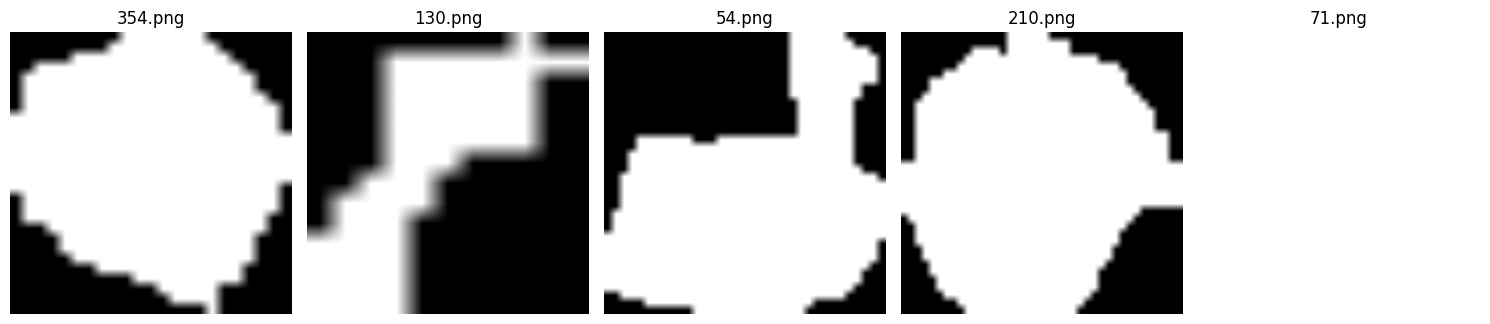

In [6]:
show_random_cropped_images(cropped_images_root="/kaggle/working/cropped_masks", num_images=5)


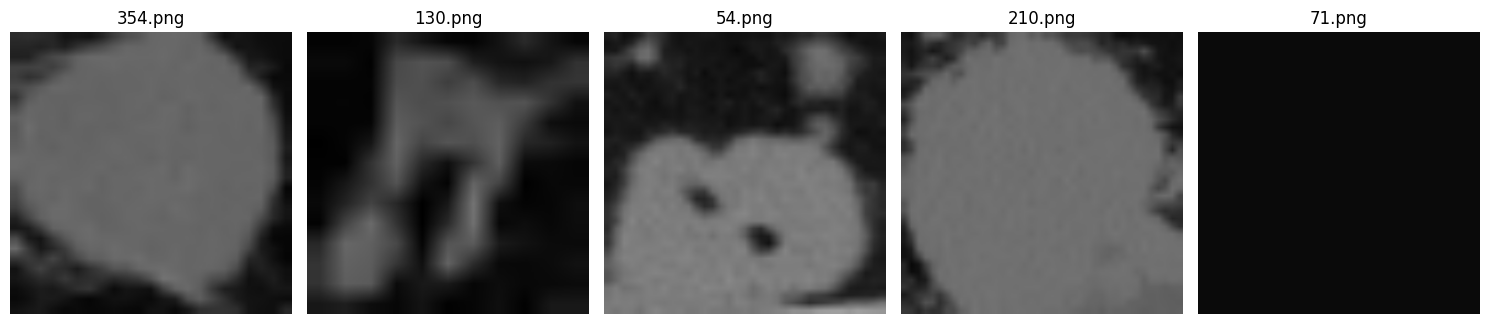

In [7]:
show_random_cropped_images(cropped_images_root="/kaggle/working/cropped_images", num_images=5)


In [8]:
# import cv2
# import os

# def resize_all_images(input_dir, output_dir, target_size=(256, 256)):
#     """
#     Resize all images in the input directory to the target size and save them in the output directory.

#     Args:
#     - input_dir (str): Path to the directory containing images to resize.
#     - output_dir (str): Path to the directory where resized images will be saved.
#     - target_size (tuple): Desired size (width, height) for resizing images. Default is (256, 256).
#     """
#     # Ensure output directory exists
#     os.makedirs(output_dir, exist_ok=True)

#     for patient_id in os.listdir(input_dir):
#         patient_input_dir = os.path.join(input_dir, patient_id)
#         patient_output_dir = os.path.join(output_dir, patient_id)

#         if not os.path.isdir(patient_input_dir):
#             continue  # Skip non-directory files

#         os.makedirs(patient_output_dir, exist_ok=True)

#         for image_name in os.listdir(patient_input_dir):
#             if image_name.lower().endswith(('.png', '.jpeg', '.jpg')):
#                 input_path = os.path.join(patient_input_dir, image_name)
#                 output_path = os.path.join(patient_output_dir, image_name)

#                 # Read and resize image
#                 img = cv2.imread(input_path)
#                 if img is not None:
#                     resized_img = cv2.resize(img, target_size)
#                     cv2.imwrite(output_path, resized_img)
#                 else:
#                     print(f"Warning: Unable to read image {input_path}")

#     print("Resizing complete!")


In [9]:
# resize_all_images(input_dir="cropped_images", output_dir="/kaggle/working/resized_images", target_size=(256, 256))


In [10]:
# resize_all_images(input_dir="/kaggle/working/cropped_masks", output_dir="/kaggle/working/resized_masks", target_size=(256, 256))


In [11]:
# show_random_cropped_images(cropped_images_root="/kaggle/working/resized_masks", num_images=5)


In [12]:
import os
import shutil

def move_and_rename_images(source_dir, destination_dir):
    """
    Moves images from subject subdirectories to a single destination directory,
    renaming them with the format <subject_number>_<image_number>.png.

    :param source_dir: Path to the source directory containing subject folders.
    :param destination_dir: Path to the destination directory for renamed images.
    """
    # Ensure the destination directory exists
    os.makedirs(destination_dir, exist_ok=True)

    # Iterate through the directories in the source
    for subject_folder in os.listdir(source_dir):
        subject_path = os.path.join(source_dir, subject_folder)
        
        if os.path.isdir(subject_path):
            # Extract the subject number (e.g., "Subject_0" -> "0")
            subject_number = subject_folder.split('_')[-1]
            
            # Iterate through images in the subject folder
            for image_file in os.listdir(subject_path):
                image_path = os.path.join(subject_path, image_file)
                
                if os.path.isfile(image_path):
                    # Extract the image number and rename it
                    image_number = os.path.splitext(image_file)[0]
                    new_image_name = f"{subject_number}_{image_number}.png"
                    new_image_path = os.path.join(destination_dir, new_image_name)
                    
                    # Move the image to the new location
                    shutil.move(image_path, new_image_path)

    print(f"Images moved successfully to {destination_dir}!")



In [13]:
source_directory = "/kaggle/working/cropped_masks"
destination_directory = "/kaggle/working/train/masks"
move_and_rename_images(source_directory, destination_directory)


Images moved successfully to /kaggle/working/train/masks!


In [14]:
# Example usage
source_directory = "/kaggle/working/cropped_images"
destination_directory = "/kaggle/working/train/images"
move_and_rename_images(source_directory, destination_directory)


Images moved successfully to /kaggle/working/train/images!


In [15]:
# Example usage
crop_and_resize_images(
    images_root="/kaggle/input/computer-vision-project/val/images",
    masks_root="/kaggle/input/computer-vision-project/val/masks",
    detections_root="/kaggle/input/computer-vision-project/val/detections",
    output_images_root="/kaggle/working/cropped_images",
    output_masks_root="/kaggle/working/cropped_masks",
    resize_shape=(256, 256)  # Resize to 256x256
)

Skipping 100.png for Subject_57: Missing detection or mask
Skipping 1.png for Subject_57: Missing detection or mask
Skipping 10.png for Subject_57: Missing detection or mask
Skipping 101.png for Subject_57: Missing detection or mask
Skipping 0.png for Subject_57: Missing detection or mask
Processed patient Subject_57
Skipping 100.png for Subject_59: Missing detection or mask
Skipping 1.png for Subject_59: Missing detection or mask
Skipping 10.png for Subject_59: Missing detection or mask
Skipping 101.png for Subject_59: Missing detection or mask
Skipping 0.png for Subject_59: Missing detection or mask
Processed patient Subject_59
Skipping 100.png for Subject_58: Missing detection or mask
Skipping 1.png for Subject_58: Missing detection or mask
Skipping 10.png for Subject_58: Missing detection or mask
Skipping 101.png for Subject_58: Missing detection or mask
Skipping 0.png for Subject_58: Missing detection or mask
Processed patient Subject_58
Skipping 11.png for Subject_60: Missing det

In [16]:
source_directory = "/kaggle/working/cropped_masks"
destination_directory = "/kaggle/working/val/masks"
move_and_rename_images(source_directory, destination_directory)


Images moved successfully to /kaggle/working/val/masks!


In [17]:
source_directory = "/kaggle/working/cropped_images"
destination_directory = "/kaggle/working/val/images"
move_and_rename_images(source_directory, destination_directory)


Images moved successfully to /kaggle/working/val/images!


In [18]:
# Install nnUNet
# !pip install nnunet


# Data PreProcessing

In [19]:
# Define your paths
train_image_dir = '/kaggle/working/train/images'
train_mask_dir = '/kaggle/working/train/masks'
val_image_dir ='/kaggle/working/val/images'
val_mask_dir = '/kaggle/working/val/masks'


In [20]:
def resize(input_image, input_mask):
    input_image = tf.image.resize(input_image, (128, 128), method="nearest")
    input_mask = tf.image.resize(input_mask, (128, 128), method="nearest")

    return input_image, input_mask 

In [21]:
def normalize(input_image, input_mask):
    input_image = tf.cast(input_image, tf.float32) / 255.0
    input_mask = tf.cast(input_mask, tf.float32) / 255.0
  
    return input_image, input_mask

In [22]:
# def load_image_train(datapoint):
#     input_image = datapoint["image"]
#     input_mask = datapoint["segmentation_mask"]
#     input_image, input_mask = resize(input_image, input_mask)
#     input_image, input_mask = augment(input_image, input_mask)
#     input_image, input_mask = normalize(input_image, input_mask)

#     return input_image, input_mask

In [23]:
# def load_image(image_file, mask_file):
#     image = tf.io.read_file(image_file)
#     image = tf.image.decode_png(image, channels=3)
#     image = tf.image.resize(image, (256, 256))
#     image = tf.cast(image, tf.float32) / 255.0

#     mask = tf.io.read_file(mask_file)
#     mask = tf.image.decode_png(mask, channels=1)
#     mask = tf.image.resize(mask, (256, 256))
#     mask = tf.cast(mask, tf.float32) / 255.0

#     return image, mask


In [24]:
def load_image(image_file, mask_file, num_classes=2):
    # Read and decode the image
    image = tf.io.read_file(image_file)
    image = tf.image.decode_png(image, channels=1)  # Decode image with 1 channels (grayscale)
    
    # Read and decode the mask
    mask = tf.io.read_file(mask_file)
    mask = tf.image.decode_png(mask, channels=1)  # Decode mask with 1 channel (grayscale)

    # Apply resize function
    image, mask = resize(image, mask)

    # Apply normalize function with class count
    image, mask = normalize(image, mask)

    return image, mask


In [25]:
def create_dataset(image_dir, mask_dir):
    image_files = sorted([os.path.join(image_dir, f) for f in os.listdir(image_dir)])
    mask_files = sorted([os.path.join(mask_dir, f) for f in os.listdir(mask_dir)])

    dataset = tf.data.Dataset.from_tensor_slices((image_files, mask_files))
    dataset = dataset.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
    return dataset


In [26]:
# Load training and testing datasets
train_dataset = create_dataset(train_image_dir, train_mask_dir)


In [27]:
val_dataset = create_dataset(val_image_dir, val_mask_dir)


In [28]:
print(train_dataset)

<_ParallelMapDataset element_spec=(TensorSpec(shape=(128, 128, 1), dtype=tf.float32, name=None), TensorSpec(shape=(128, 128, 1), dtype=tf.float32, name=None))>


Image shape: (128, 128, 1)


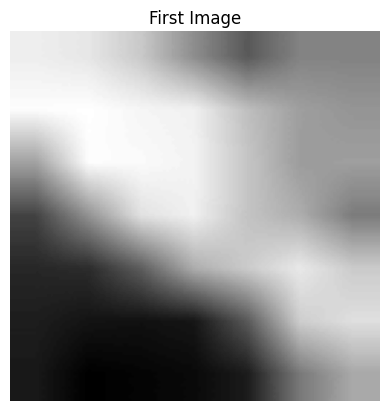

In [29]:
# Display the first image in the dataset
for image, mask in train_dataset.take(1):  # Take the first batch
    print(f"Image shape: {image.shape}")
    # print(f"Image shape: {mask}")
    plt.imshow(image.numpy().squeeze(), cmap='gray')  # Assuming image is grayscale
    plt.title("First Image")
    plt.axis('off')
    plt.show()


In [30]:
print(len(train_dataset))

1547


In [31]:
print(len(val_dataset))

78


In [58]:
BATCH_SIZE = 32
BUFFER_SIZE = 1000


In [59]:

# train_batches = train_dataset.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
# train_batches = train_batches.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# # Ensuring the validation and test batches can also repeat
# validation_batches = val_dataset.take(100).batch(BATCH_SIZE).repeat()
# val_batches = val_dataset.skip(70).take(100).batch(BATCH_SIZE)


In [60]:
# print(train_batches)

# Data Visualize

In [61]:
def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ["Input Image", "True Mask", "Predicted Mask"]

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
    plt.axis("off")
  plt.show()

In [62]:
# print(len(val_batches))


In [63]:
# sample_batch = next(iter(val_batches))
# random_index = np.random.choice(sample_batch[0].shape[0])
# sample_image, sample_mask = sample_batch[0][random_index], sample_batch[1][random_index]
# display([sample_image, sample_mask])

# Build MODEL

In [64]:
def double_conv_block(x, n_filters):
    # First Conv2D + BatchNormalization + ReLU
    x = layers.Conv2D(n_filters, 3, padding="same", activation=None, kernel_initializer="he_normal")(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Second Conv2D + BatchNormalization + ReLU
    x = layers.Conv2D(n_filters, 3, padding="same", activation=None, kernel_initializer="he_normal")(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    return x


In [65]:
def downsample_block(x, n_filters):
    f = double_conv_block(x, n_filters)
    p = layers.MaxPool2D(2)(f)
    p = layers.Dropout(0.3)(p)

    return f, p

In [66]:
def upsample_block(x, conv_features, n_filters):
    # upsample
    x = layers.Conv2DTranspose(n_filters, 3, 2, padding="same")(x)
    # concatenate 
    x = layers.concatenate([x, conv_features])
    # dropout
    x = layers.Dropout(0.3)(x)
    # Conv2D twice with ReLU activation
    x = double_conv_block(x, n_filters)

    return x

In [67]:
def build_unet_model():

    # inputs
    inputs = layers.Input(shape=(128,128,1))

    # encoder: contracting path - downsample
    # 1 - downsample
    f1, p1 = downsample_block(inputs, 64)
    # 2 - downsample
    f2, p2 = downsample_block(p1, 128)
    # 3 - downsample
    f3, p3 = downsample_block(p2, 256)
    # 4 - downsample
    f4, p4 = downsample_block(p3, 512)

    # 5 - bottleneck
    bottleneck = double_conv_block(p4, 1024)

    # decoder: expanding path - upsample
    # 6 - upsample
    u6 = upsample_block(bottleneck, f4, 512)
    # 7 - upsample
    u7 = upsample_block(u6, f3, 256)
    # 8 - upsample
    u8 = upsample_block(u7, f2, 128)
    # 9 - upsample
    u9 = upsample_block(u8, f1, 64)

    # outputs
    outputs = layers.Conv2D(1, 1, padding="same", activation = None)(u9)

    # unet model with Keras Functional API
    unet_model = tf.keras.Model(inputs, outputs, name="U-Net")

    return unet_model

In [68]:
unet_model = build_unet_model()

In [69]:
unet_model.summary()

Model: "U-Net"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 128, 128,  │        640 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        256 │ conv2d_19[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_18 (ReLU)     │ (None, 128, 128,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 128, 128,  │     36,928 │ re_lu_18[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        256 │ conv2d_20[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_19 (ReLU)     │ (None, 128, 128,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 64, 64,    │          0 │ re_lu_19[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 64, 64,    │          0 │ max_pooling2d_4[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 64, 64,    │     73,856 │ dropout_8[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ conv2d_21[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_20 (ReLU)     │ (None, 64, 64,    │          0 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 64, 64,    │    147,584 │ re_lu_20[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ conv2d_22[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_21 (ReLU)     │ (None, 64, 64,    │          0 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 32, 32,    │          0 │ re_lu_21[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 32, 32,    │          0 │ max_pooling2d_5[

 Total params: 34,535,745 (131.74 MB)

 Trainable params: 34,523,969 (131.70 MB)

 Non-trainable params: 11,776 (46.00 KB)

In [70]:
tf.keras.utils.plot_model(unet_model, show_shapes=True)

In [71]:
# import tensorflow.keras.backend as K

# def dice_loss(y_true, y_pred):
#     smooth = 1e-6  # Small constant to avoid division by zero
#     y_true_f = K.flatten(y_true)  # Flatten ground truth
#     y_pred_f = K.flatten(y_pred)  # Flatten prediction
#     intersection = K.sum(y_true_f * y_pred_f)  # Compute intersection
#     return 1 - (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


In [72]:
# def combined_dice_bce_loss(y_true, y_pred):
#     bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
#     dice = dice_loss(y_true, y_pred)
#     return bce + dice


In [73]:
import tensorflow as tf
from tensorflow.keras import backend as K

class BCEDiceLoss(tf.keras.losses.Loss):
    def __init__(self, epsilon=1e-6, prob_of_bce=0.4, **kwargs):
        super(BCEDiceLoss, self).__init__(**kwargs)
        self.epsilon = epsilon
        self.prob_of_bce = prob_of_bce
        self.bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)

    def call(self, y_true, y_pred):
        # Binary cross-entropy loss from logits
        bce_loss = self.bce(y_true, y_pred)
        
        # Sigmoid for Dice loss
        y_pred = tf.sigmoid(y_pred)

        # Flatten the tensors
        y_pred = tf.reshape(y_pred, [-1])
        y_true = tf.reshape(y_true, [-1])

        # Compute Dice coefficient
        intersection = tf.reduce_sum(y_pred * y_true)
        union = tf.reduce_sum(y_pred) + tf.reduce_sum(y_true)
        dice = (2. * intersection + self.epsilon) / (union + self.epsilon)
        
        # Dice loss is 1 - Dice coefficient
        dice_loss = 1 - dice

        # Combine BCE and Dice losses
        return (self.prob_of_bce * bce_loss) + dice_loss


In [74]:
import tensorflow as tf

def dice_coefficient(y_true, y_pred, smooth=1e-6):
    """
    Compute the Dice coefficient, a metric for evaluating segmentation performance.
    Args:
        y_true: Ground truth labels.
        y_pred: Predicted labels (usually probabilities or logits).
        smooth: Smoothing factor to avoid division by zero.
    Returns:
        Dice coefficient (range 0 to 1, where 1 is perfect overlap).
    """
    # Flatten the tensors to 1D for easy computation
    y_pred = tf.sigmoid(y_pred)
    
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)


In [75]:
unet_model.compile(optimizer=tf.keras.optimizers.Adam(),
                   loss='BCEDiceLoss(epsilon=1e-6, prob_of_bce=0.4)',
                   metrics=["accuracy", dice_coefficient])  # Pass the custom Dice coefficient function


In [76]:
print(len(val_dataset))

2


In [77]:
NUM_EPOCHS = 100

TRAIN_LENGTH = len(train_dataset)
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

VAL_SUBSPLITS = 5
TEST_LENTH = len(val_dataset)
VALIDATION_STEPS = TEST_LENTH // BATCH_SIZE // VAL_SUBSPLITS



In [78]:
# len(validation_batches)

In [79]:
checkpointer = tf.keras.callbacks.ModelCheckpoint(
    'bi_loss_20_epoch_cropp_segmentation_Unet.keras', 
    verbose=1, 
    save_best_only=True, 
    monitor='val_loss',  # Metric to monitor
    mode='min'  # Save model when 'val_loss' is minimized
)

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss'),
    tf.keras.callbacks.TensorBoard(log_dir='logs'),
    checkpointer
]


In [80]:
# physical_devices = tf.config.list_physical_devices('GPU')
# for device in physical_devices:
#     tf.config.experimental.set_memory_growth(device, True)


In [81]:
# print(len(list(train_batches)))  # Number of training batches
# print(len(list(validation_batches)))  # Number of validation batches


In [82]:
# Prepare datasets
train_dataset = (
    train_dataset
    .shuffle(1000)                             # Shuffle the dataset
    .batch(BATCH_SIZE)                         # Create batches
    .prefetch(tf.data.AUTOTUNE)                # Prefetch for performance
)

val_dataset = (
    val_dataset
    .batch(BATCH_SIZE)                         # Create batches
    .prefetch(tf.data.AUTOTUNE)                # Prefetch for performance
)

In [83]:
model_history = unet_model.fit(
    train_dataset,
    epochs=NUM_EPOCHS,
    validation_data=val_dataset,
    callbacks=callbacks
)


Epoch 1/100


ValueError: Exception encountered when calling Functional.call().

[1mInput 0 of layer "conv2d_19" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, None, 128, 128)[0m

Arguments received by Functional.call():
  • inputs=tf.Tensor(shape=(None, None, 128, 128, 1), dtype=float32)
  • training=True
  • mask=None

In [ ]:
def display_learning_curves(history):
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    # Dynamically determine the range of epochs
    epochs_range = range(len(acc))

    fig = plt.figure(figsize=(12, 6))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label="Train Accuracy")
    plt.plot(epochs_range, val_acc, label="Validation Accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc="lower right")

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label="Train Loss")
    plt.plot(epochs_range, val_loss, label="Validation Loss")
    plt.title("Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc="upper right")

    fig.tight_layout()
    plt.show()


In [ ]:
display_learning_curves(unet_model.history)

In [ ]:
def create_mask(pred_mask):
  pred_mask = tf.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[..., tf.newaxis]
  return pred_mask[0]

In [ ]:
def show_predictions(dataset=None, num=1):
  if dataset:
    for image, mask in dataset.take(num):
      pred_mask = unet_model.predict(image)
      display([image[0], mask[0], create_mask(pred_mask)])
  else:
    display([sample_image, sample_mask,
             create_mask(model.predict(sample_image[tf.newaxis, ...]))])

In [ ]:
count = 0
for i in val_dataset:
    count +=1
print("number of batches:", count)

In [ ]:
def show_predictions(dataset=None, num=1, model=None):
    """
    Displays predictions for a given number of samples from the dataset.

    Args:
        dataset: A tf.data.Dataset containing batches of images and masks.
        num: Number of samples to display.
        model: Trained model used for prediction.
    """
    import matplotlib.pyplot as plt
    import tensorflow as tf

    if dataset is None:
        raise ValueError("A dataset must be provided.")
    if model is None:
        raise ValueError("A trained model must be provided.")

    def display(display_list):
        """Helper function to display a list of images."""
        plt.figure(figsize=(15, 5))
        for i, img in enumerate(display_list):
            plt.subplot(1, len(display_list), i + 1)
            plt.imshow(tf.keras.utils.array_to_img(img))
            plt.axis("off")
        plt.show()

    sample_count = 0
    for batch_images, batch_masks in dataset:
        for image, mask in zip(batch_images, batch_masks):  # Process each sample in the batch
            if sample_count >= num:
                return  # Stop once the desired number of samples is displayed
            
            # Predict the mask for the single image
            pred_mask = model.predict(image[tf.newaxis, ...])[0]
            
            # Display the image, ground truth mask, and predicted mask
            display([image, mask, create_mask(pred_mask)])
            sample_count += 1


In [ ]:
def create_mask(pred_mask):
    """Converts the predicted mask to a format suitable for visualization."""
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = tf.expand_dims(pred_mask, axis=-1)  # Expand dims for visualization
    return pred_mask


In [ ]:
# Example usage:
# Display 20 samples from the validation dataset
show_predictions(val_dataset, num=70, model=unet_model)


In [ ]:
show_predictions(val_dataset, 50)